In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%

In [2]:
outcomes = [10, 0]
probabilities = [0.4, 0.6]

# Simulates a single roll of a die with 40% chance of getting a 10 and 60% chance of getting a 0
def simulateRoll(outcomes, probabilities):
    result = random.choices(outcomes, weights=probabilities, k=1)[0]
    return result

# Adds the result of each roll to an array and returns the array
def simulateGame(numRolls):
    results = []
    for i in range(numRolls):
        results.append(simulateRoll(outcomes, probabilities))
    return results

# Plot the averages as the game progresses
def plotAverages(results):
    averages = []
    for i in range(len(results)):
        averages.append(np.mean(results[:i+1]))
    plt.plot(averages)
    plt.show()

Average:  4.018


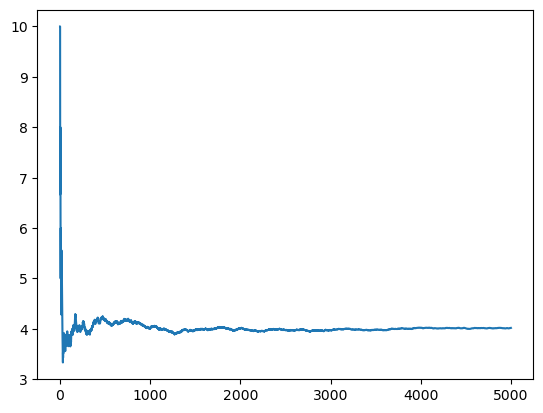

In [3]:
# Run the simulation and plot the averages
games = 5000
results = simulateGame(games)
print("Average: ", np.mean(results))

plotAverages(results)

# Calculating the expected value as we go

We want to update our expected value as we start getting results, not after a lot of tries

Since we don't know where where it should converge, we should notice when it stops "oscilating". We could look at the previous delta moves "a little".

In [17]:
# Calculate the expected value of the game
def calculateExpectedValue(currentIteration, previousExpectedValue):
    learningRate = 1/currentIteration

    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

def calculateExpectedValueFixedLearningRate(learningRate, previousExpectedValue):
    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

# Simulate the game and calculate the expected value
def simulateGameWithExpectedValue():
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    # Aquí hay que checar cuándo empieza a converger con un while y el error sea menor a ¿0.01? jaja lo saqué de la nada

    currentIteration = 1
    error = 1
    startingIteration = 500

    for i in range(startingIteration):
        expectedValue = calculateExpectedValue(currentIteration, expectedValue)
        currentIteration += 1

    while abs(error) >= 0.001:
        currentIteration += 1
        previousExpectedValue = expectedValue
        expectedValue = calculateExpectedValue(currentIteration, expectedValue)
        error = abs(expectedValue - previousExpectedValue)

    print("\nConvergence iteration: ", currentIteration)
    print("Error: ", error)

    return expectedValue

def simulateGameWithExpectedValueFixedLearningRate(learningRate):
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    # Aquí hay que checar cuándo empieza a converger con un while y el error sea menor a ¿0.01? jaja lo saqué de la nada

    currentIteration = 1
    error = 1
    startingIteration = 500

    for i in range(startingIteration):
        expectedValue = calculateExpectedValueFixedLearningRate(learningRate, expectedValue)
        currentIteration += 1

    while currentIteration < 1000000 and error >= 0.001:
        currentIteration += 1
        previousExpectedValue = expectedValue
        expectedValue = calculateExpectedValueFixedLearningRate(learningRate, expectedValue)
        error = abs(expectedValue - previousExpectedValue)


    print("\nConvergence iteration with learning rate ", learningRate, ": ", currentIteration)
    print("Error: ", error)

    return expectedValue

# Run the simulation and print the expected value
expectedValue = simulateGameWithExpectedValue()
print("Expected Value: ", expectedValue)

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValue = simulateGameWithExpectedValueFixedLearningRate(learningRate)
    print("Expected Value with learning rate ", learningRate, ": ", expectedValue)




Convergence iteration:  3885
Error:  0.0009996447823428234
Expected Value:  3.8826203346203325

Convergence iteration with learning rate  0.1 :  1000000
Error:  0.5168646994205472
Expected Value with learning rate  0.1 :  5.348217705215074

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.04223329803185738
Expected Value with learning rate  0.01 :  4.181096505153917

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.003920967700034694
Expected Value with learning rate  0.001 :  3.9170467323345672

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.008269825292340549
Expected Value with learning rate  0.002 :  4.12664282087802

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.020393276492340462
Expected Value with learning rate  0.005 :  4.058262021975771

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.02872066472737167
Expected Value with learning rate  0.007 :  4.0742314391828955

Conver